In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

/home/modules/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/modules/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
import numpy as np 
from os import path
import pandas as pd 
import os
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#os.environ["CUDA_VISIBLE_DEVICES"] = '0'
#import matplotlib.pyplot as plt
import seaborn as sns

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
tickfontsize=20
labelfontsize = tickfontsize

import datetime

import math

import time

In [3]:
import pickle

# Load data

In [53]:
stacked = True

In [54]:
n_core = 18

In [55]:
if stacked:
    ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_no_norm/stacked.csv')
else:
    ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_no_norm/ml_data.csv')
    #ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_v1/ml_data.csv')
    #ml_data = pd.read_csv('./all_mofs/stacked.csv')

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
ml_data = ml_data.drop([col for col in ml_data.keys() if 'Smiles' in col] + [col for col in 
                                                                             ml_data.keys() if 'Unnamed' in col] + ['#_of_Linkers'] + ['Metal_ID'], axis=1)

In [57]:
#ml_data = pd.read_csv('./no_cat/ml_data.csv')

In [58]:
ml_data.head()

,filename,valence_pa,atomic_rad_pa_(angstroms),affinity_pa_(eV),ionization_potential_pa_(eV),electronegativity_pa,Crystal_Id,Crystal_ID#,Dom._Pore_(ang.),Max._Pore_(ang.),...,mean_CH4_v/v_65_bar,std_CH4_v/v_65_bar,norm_CH4_v/v_100_bar,mean_CH4_v/v_100_bar,std_CH4_v/v_100_bar,norm_CH4_v/v_248_bar,mean_CH4_v/v_248_bar,std_CH4_v/v_248_bar,pressure,vol_uptake
0,hypotheticalMOF_6000523_i_3_j_19_k_12_m_9_cat_...,1.0,1.095,0.9945,10.185,2.535,-117,-117,1.25,1.25,...,163.84668,58.292255,-2.790110,182.71011,65.484924,NaN,216.32376,81.18772,1.0,0.000000
1,hypotheticalMOF_5053773_i_1_j_27_k_27_m_7_cat_...,2.0,1.420,-0.6000,9.390,1.650,77,77,5.75,7.75,...,163.84668,58.292255,0.805583,182.71011,65.484924,0.697362,216.32376,81.18772,1.0,12.409546
2,hypotheticalMOF_5051526_i_1_j_27_k_5_m_9_cat_1...,2.0,1.420,-0.6000,9.390,1.650,-122,-122,4.75,6.25,...,163.84668,58.292255,0.506575,182.71011,65.484924,0.349411,216.32376,81.18772,1.0,14.970042
3,hypotheticalMOF_5004666_i_0_j_20_k_12_m_1_cat_...,1.2,1.232,-0.1878,10.236,2.008,122,122,4.25,5.75,...,163.84668,58.292255,-0.747845,182.71011,65.484924,-0.810289,216.32376,81.18772,1.0,11.924002
4,hypotheticalMOF_36515_i_2_j_17_k_6_m_2_cat_1.cif,2.0,1.450,1.2360,7.730,1.900,-93,-93,5.25,5.75,...,163.84668,58.292255,0.183220,182.71011,65.484924,NaN,216.32376,81.18772,1.0,49.924683


In [59]:
for i in ml_data.keys():
    print(i)

filename
valence_pa
atomic_rad_pa_(angstroms)
affinity_pa_(eV)
ionization_potential_pa_(eV)
electronegativity_pa
Crystal_Id
Crystal_ID#
Dom._Pore_(ang.)
Max._Pore_(ang.)
Void_Fraction
Surf._Area_(m2/g)
Vol._Surf._Area
Density
norm_Mafp_Br1_C2_C1
norm_Mafp_Br1_C2_C2
norm_Mafp_Br1_C2_C3
norm_Mafp_Br1_C3_Br1
norm_Mafp_Br1_C3_C1
norm_Mafp_Br1_C3_C2
norm_Mafp_Br1_C3_C3
norm_Mafp_Br1_C3_C4
norm_Mafp_Br1_C3_N1
norm_Mafp_Br1_C3_N2
norm_Mafp_Br1_C3_N3
norm_Mafp_Br1_C3_O1
norm_Mafp_Br1_C4_Br1
norm_Mafp_Br1_C4_C2
norm_Mafp_Br1_C4_C3
norm_Mafp_Br1_C4_C4
norm_Mafp_Br1_C4_H1
norm_Mafp_Br1_C4_N1
norm_Mafp_Br1_C4_N2
norm_Mafp_Br1_C4_N3
norm_Mafp_Br1_C4_O1
norm_Mafp_Br1_C4_O2
norm_Mafp_Br1_N2_C2
norm_Mafp_Br1_N2_C3
norm_Mafp_Br1_N2_C4
norm_Mafp_Br1_N2_N1
norm_Mafp_Br1_N2_N2
norm_Mafp_Br1_N2_N3
norm_Mafp_Br1_N3_Br1
norm_Mafp_Br1_N3_C2
norm_Mafp_Br1_N3_C3
norm_Mafp_Br1_N3_H1
norm_Mafp_Br1_N3_N2
norm_Mafp_Br1_N3_O2
norm_Mafp_Br1_O2_C2
norm_Mafp_Br1_O2_C3
norm_Mafp_Br1_O2_C4
norm_Mafp_C1_C2_C2
norm_Mafp_C1

# Process data

Caution when running below

In [60]:
# ml_data = ml_data.drop(['norm_Dom._Pore_(ang.)', 'norm_Max._Pore_(ang.)',
# 'norm_Void_Fraction',
# 'norm_Surf._Area_(m2/g)',
# 'norm_Vol._Surf._Area',
# 'norm_Density'], axis=1)

In [61]:
def norm_col(df, col_name):
    
    nrow = len(df)
    mean = df[col_name].mean()
    std = df[col_name].std()
    
    df['norm_' + col_name] = (df[col_name] - mean) / std
    #df['mean_' + col_name] = [mean for i in range(nrow)]
    #df['std_' + col_name] = [std for i in range(nrow)]
    return mean, std

In [62]:
#default is below 

other_props = ['norm_Dom._Pore_(ang.)',
 'norm_Max._Pore_(ang.)',
 'norm_Void_Fraction',
 'norm_Surf._Area_(m2/g)',
 'norm_Vol._Surf._Area',
 'norm_Density',
  'norm_valence_pa',
   'norm_atomic_rad_pa_(angstroms)',
     'norm_affinity_pa_(eV)',
       'norm_ionization_potential_pa_(eV)',
           'norm_electronegativity_pa']

# other_props = ['norm_valence_pa',
#    'norm_atomic_rad_pa_(angstroms)',
#      'norm_affinity_pa_(eV)',
#        'norm_ionization_potential_pa_(eV)',
#            'norm_electronegativity_pa']

In [63]:
#merge gravimetric uptake
if not stacked:
    y_data = pd.read_excel('/home/rgur/efrc/data_DONOTTOUCH/hMOF_allData_March25_2013.xlsx')
    ml_data = ml_data.join(y_data[['Crystal ID#', 'CH4 cm3/g 35 bar']].set_index('Crystal ID#'), on='Crystal_ID#')

In [64]:
#replace all spaced cols with _
if not stacked:
    for key in ml_data.keys():
        if ' ' in key:
            new_key = key.replace(' ', '_')
            ml_data[new_key] = ml_data[key]
            ml_data = ml_data.drop(key, axis=1)

In [65]:
def get_cat(s):
    '''
    Returns interpenetration
    '''
    if 'cat' in s:
        return int(s.split('_')[-1][0])
    else:
        return 0

In [66]:
#uncomment below to create weighted interpenetration feature and norm it
# weighted_cat = [get_cat(i) for i in ml_data['filename'].tolist()]
# ml_data['weighted_cat'] = weighted_cat
# norm_col(ml_data, 'weighted_cat')
# other_props.append('norm_weighted_cat')
# ml_data.head()

In [67]:
#uncomment below to create one-hot interpenetration feature and norm it
one_hot = [[0]*4 for i in range(len(ml_data))]
for i, f in enumerate(ml_data['filename'].tolist()):
    one_hot[i][get_cat(f)] = 1
oh_1 = []
oh_2 = []
oh_3 = []
oh_4 = []
for i in one_hot:
    oh_1.append(i[0])
    oh_2.append(i[1])
    oh_3.append(i[2])
    oh_4.append(i[3])
ml_data['oh_1'] = oh_1
ml_data['oh_2'] = oh_2
ml_data['oh_3'] = oh_3
ml_data['oh_4'] = oh_4
other_props.extend(['oh_1','oh_2','oh_3','oh_4'])
ml_data.head()

,filename,valence_pa,atomic_rad_pa_(angstroms),affinity_pa_(eV),ionization_potential_pa_(eV),electronegativity_pa,Crystal_Id,Crystal_ID#,Dom._Pore_(ang.),Max._Pore_(ang.),...,std_CH4_v/v_100_bar,norm_CH4_v/v_248_bar,mean_CH4_v/v_248_bar,std_CH4_v/v_248_bar,pressure,vol_uptake,oh_1,oh_2,oh_3,oh_4
0,hypotheticalMOF_6000523_i_3_j_19_k_12_m_9_cat_...,1.0,1.095,0.9945,10.185,2.535,-117,-117,1.25,1.25,...,65.484924,NaN,216.32376,81.18772,1.0,0.000000,0,0,1,0
1,hypotheticalMOF_5053773_i_1_j_27_k_27_m_7_cat_...,2.0,1.420,-0.6000,9.390,1.650,77,77,5.75,7.75,...,65.484924,0.697362,216.32376,81.18772,1.0,12.409546,0,1,0,0
2,hypotheticalMOF_5051526_i_1_j_27_k_5_m_9_cat_1...,2.0,1.420,-0.6000,9.390,1.650,-122,-122,4.75,6.25,...,65.484924,0.349411,216.32376,81.18772,1.0,14.970042,0,1,0,0
3,hypotheticalMOF_5004666_i_0_j_20_k_12_m_1_cat_...,1.2,1.232,-0.1878,10.236,2.008,122,122,4.25,5.75,...,65.484924,-0.810289,216.32376,81.18772,1.0,11.924002,0,0,0,1
4,hypotheticalMOF_36515_i_2_j_17_k_6_m_2_cat_1.cif,2.0,1.450,1.2360,7.730,1.900,-93,-93,5.25,5.75,...,65.484924,NaN,216.32376,81.18772,1.0,49.924683,0,1,0,0


In [68]:
#only do if using grav. uptake as property
#norm gravimetric uptake
if not stacked:
    target_mean, target_std = norm_col(ml_data, 'CH4_cm3/g_35_bar')

In [69]:
if stacked:
    target_mean, target_std = norm_col(ml_data, 'vol_uptake')
    property_used = 'norm_vol_uptake'
    #target_mean = float(ml_data[property_used.replace('norm', 'mean')][0])
    #target_std = float(ml_data[property_used.replace('norm', 'std')][0])
else:
    property_used = 'norm_CH4_cm3/g_35_bar'
#property_used = 'norm_vol_uptake' #column name of target #default is 1 bar
#property_used = 'norm_vol_uptake'

print(len(ml_data))
ml_data = ml_data.iloc[ml_data[property_used].dropna().index]
ml_data = ml_data.reset_index().drop('index', axis=1)
print(len(ml_data))

533430
533430


In [70]:
for i in ml_data.keys():
    print(i)

filename
valence_pa
atomic_rad_pa_(angstroms)
affinity_pa_(eV)
ionization_potential_pa_(eV)
electronegativity_pa
Crystal_Id
Crystal_ID#
Dom._Pore_(ang.)
Max._Pore_(ang.)
Void_Fraction
Surf._Area_(m2/g)
Vol._Surf._Area
Density
norm_Mafp_Br1_C2_C1
norm_Mafp_Br1_C2_C2
norm_Mafp_Br1_C2_C3
norm_Mafp_Br1_C3_Br1
norm_Mafp_Br1_C3_C1
norm_Mafp_Br1_C3_C2
norm_Mafp_Br1_C3_C3
norm_Mafp_Br1_C3_C4
norm_Mafp_Br1_C3_N1
norm_Mafp_Br1_C3_N2
norm_Mafp_Br1_C3_N3
norm_Mafp_Br1_C3_O1
norm_Mafp_Br1_C4_Br1
norm_Mafp_Br1_C4_C2
norm_Mafp_Br1_C4_C3
norm_Mafp_Br1_C4_C4
norm_Mafp_Br1_C4_H1
norm_Mafp_Br1_C4_N1
norm_Mafp_Br1_C4_N2
norm_Mafp_Br1_C4_N3
norm_Mafp_Br1_C4_O1
norm_Mafp_Br1_C4_O2
norm_Mafp_Br1_N2_C2
norm_Mafp_Br1_N2_C3
norm_Mafp_Br1_N2_C4
norm_Mafp_Br1_N2_N1
norm_Mafp_Br1_N2_N2
norm_Mafp_Br1_N2_N3
norm_Mafp_Br1_N3_Br1
norm_Mafp_Br1_N3_C2
norm_Mafp_Br1_N3_C3
norm_Mafp_Br1_N3_H1
norm_Mafp_Br1_N3_N2
norm_Mafp_Br1_N3_O2
norm_Mafp_Br1_O2_C2
norm_Mafp_Br1_O2_C3
norm_Mafp_Br1_O2_C4
norm_Mafp_C1_C2_C2
norm_Mafp_C1

In [71]:
#adjustable parameters
total_frac = 1

#start_str = 'filename'
#end_str = 'valence_pa'

#start_str = 'CH4_v/v_248_bar'
#end_str = 'norm_Dom._Pore_(ang.)'

start_str = 'Density'
end_str = 'norm_Dom._Pore_(ang.)'

training_pct = .7 #.9 gives best results w/ random state = 2
patience = 10 #10 is Deepak default
batch_size = 1 #1 is default

In [72]:
#remove MOFs w/ excessive linkers or too little linkers
#ml_data = ml_data[(ml_data['#_of_Linkers'] < 7) & (ml_data['#_of_Linkers'] > 1)]

In [73]:
len(ml_data)

533430

In [74]:
def eq_space(x, y, n, force_int=False):
    step = (y - x) / (n - 1)
    if force_int:
        return [int(x + step * i) for i in range(n)]
    return [x + step * i for i in range(n)]

In [75]:
#define default params
defaults = {"patience":10, "training_pct":.8, "n_layer":2, "n_unit":10, "activation":'relu', "loss":'mse', 
            "opt":'adam', "val_pct":.2} #patience, training fraction, n hidden layers, n hidden units, activation, loss, optimizer, validation split

In [76]:
if total_frac != 1:
    ml_data = ml_data.sample(frac=total_frac, random_state=0)

In [77]:
#uncomment below when dealing with stacked
if stacked:
    ml_data['log_pressure'] = np.log(ml_data['pressure'].tolist())
    log_p_mean, log_p_std = norm_col(ml_data, 'log_pressure')

    max_p = max(ml_data['norm_log_pressure'].tolist())
    min_p = min(ml_data['norm_log_pressure'].tolist())

    other_props.append('norm_log_pressure')
    c = ml_data['filename'].unique().tolist()

    import random

    random.seed = 2

    #c = list(b.groups.keys())
    random.shuffle(c)

    n_groups = len(c)

    train_ind = round(n_groups*training_pct)

    train_groups = c[0:train_ind]
    test_groups = c[train_ind:]

    train_dataset = ml_data.loc[ml_data['filename'].isin(train_groups)]

    test_dataset = ml_data.loc[ml_data['filename'].isin(test_groups)]

    isotherm_inds = [0, 11, 89, 170, 367, 600, 1100, 3021, 5321, 7621]
    isotherm_files = [test_dataset.iloc[i]['filename'] for i in isotherm_inds]
    isotherm_df = test_dataset.loc[test_dataset['filename'].isin(isotherm_files)]

    isotherm_pressures = []
    isotherm_uptakes = []
    for i in isotherm_files:
        l1 = []
        l2 = []
        for row in isotherm_df.iterrows():
            if row[1]['filename'] == i:
                l1.append(row[1]['pressure'])
                l2.append(row[1]['vol_uptake'])
        isotherm_pressures.append(l1)
        isotherm_uptakes.append(l2)

    #del isotherm_df
    del ml_data

In [78]:
try:
    for ind, col in enumerate(train_dataset.columns):
        if start_str == col:
            start_col = ind + 1
        elif end_str == col:
            end_col = ind


    features = list(train_dataset.columns[start_col:end_col])
    features = features + other_props
except:
    for ind, col in enumerate(ml_data.columns):
        if start_str == col:
            start_col = ind + 1
        elif end_str == col:
            end_col = ind


    features = list(ml_data.columns[start_col:end_col])
    features = features + other_props    

In [79]:
len(features)

420

# Train/test split randomly

In [34]:
if not stacked:
    c = ml_data['filename'].unique().tolist()

    import random

    random.seed = 2

    #c = list(b.groups.keys())
    random.shuffle(c)

    n_groups = len(c)

    train_ind = round(n_groups*training_pct)

    train_groups = c[0:train_ind]
    print(train_groups)
    test_groups = c[train_ind:]

    train_dataset = ml_data.loc[ml_data['filename'].isin(train_groups)]

    test_dataset = ml_data.loc[ml_data['filename'].isin(test_groups)]

    del ml_data

# Train/test split according to most isolated points

In [ ]:
from scipy.spatial import KDTree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import rcParams
import random
import time

In [ ]:
n_remote = 2000

In [ ]:
def pcaDF(fp_df, X_heads):
    '''
    This function returns the pcaDF of fp_df
    '''
    fp_df = fp_df.drop_duplicates(keep='first') # delete duplication
    fp_df = fp_df.fillna(0) # fill zero in NA columns

    X_original = fp_df[X_heads]
    X_length = len(X_heads)

    # For PCA,  scaling must be done!
    # Otherwise, larger value containing X component will always be collected as important PC
    xscale = preprocessing.MinMaxScaler()
    X = xscale.fit_transform(X_original)

    n_data = len(X)
    ###############################################################



    print('Original fingerprint')  
    print('    Number of dataset =', n_data)
    print('    Dimension of X    =', X_length)



       ###############################################################
    # PCA
    n_components = min(X_length, n_data)   # reset to max size of X
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    PC_heads = list()
    for i in range(len(X[0])):
        PC_heads.append('PC' + str(i))

    X_pca_df = pd.DataFrame(data = X_pca, columns = PC_heads)
    return X_pca_df

In [ ]:
start = time.time()
X_pca_df = pcaDF(ml_data, features).iloc[:, 0:20]

In [ ]:
X_pca_df

In [ ]:
fig1,ax1 = plt.subplots(figsize = (8,8))
ax1.scatter(X_pca_df['PC0'], X_pca_df['PC1'], s=10)

In [ ]:
tree = KDTree(X_pca_df)

In [ ]:
a = tree.query(X_pca_df, k=2)

In [ ]:
import numpy as np

In [ ]:
srt = sorted(enumerate(np.max(a[0], axis=1).tolist()), key=lambda x: x[1],reverse=True)
end = time.time()
print("Time Elapsed: ", end-start)

In [ ]:
srt

In [ ]:
max([x[0] for x in srt]) == max(ml_data.index)

In [ ]:
n_train = round(training_pct*len(srt))
n_train

In [ ]:
train_inds = [x[0] for x in srt[:n_remote]]
train_inds

In [ ]:
max(X_pca_df.index)

In [ ]:
remaining = srt[n_remote:]

In [ ]:
random.shuffle(remaining)

train_ind = n_train - n_remote

train_inds += [x[0] for x in remaining[0:train_ind]]
test_inds = [x[0] for x in remaining[train_ind:]]

len(train_inds) + len(test_inds)

In [ ]:
print(len(train_inds))

In [ ]:
print(len(test_inds))

In [ ]:
train_dataset = ml_data.iloc[train_inds, :]

test_dataset = ml_data.iloc[test_inds, :]

In [ ]:
len(train_inds) + len(test_inds)

In [ ]:
train_dataset

# Finish preprocessing

In [42]:
#add noise to pressure to generate isotherm
noise = np.random.normal(0.001,.03,len(train_dataset))
len(noise)

373551

In [44]:
train_dataset['norm_log_pressure'] = train_dataset['norm_log_pressure'] + noise

In [45]:
train_dataset

,filename,valence_pa,atomic_rad_pa_(angstroms),affinity_pa_(eV),ionization_potential_pa_(eV),electronegativity_pa,Crystal_Id,Crystal_ID#,Dom._Pore_(ang.),Max._Pore_(ang.),...,std_CH4_v/v_248_bar,pressure,vol_uptake,oh_1,oh_2,oh_3,oh_4,norm_vol_uptake,log_pressure,norm_log_pressure
1,hypotheticalMOF_5053773_i_1_j_27_k_27_m_7_cat_...,2.0,1.420,-0.6000,9.390,1.650,77,77,5.75,7.75,...,81.18772,1.0,12.409546,0,1,0,0,-1.239511,0.000000,-1.544864
2,hypotheticalMOF_5051526_i_1_j_27_k_5_m_9_cat_1...,2.0,1.420,-0.6000,9.390,1.650,-122,-122,4.75,6.25,...,81.18772,1.0,14.970042,0,1,0,0,-1.210468,0.000000,-1.560767
3,hypotheticalMOF_5004666_i_0_j_20_k_12_m_1_cat_...,1.2,1.232,-0.1878,10.236,2.008,122,122,4.25,5.75,...,81.18772,1.0,11.924002,0,0,0,1,-1.245018,0.000000,-1.559791
4,hypotheticalMOF_36515_i_2_j_17_k_6_m_2_cat_1.cif,2.0,1.450,1.2360,7.730,1.900,-93,-93,5.25,5.75,...,81.18772,1.0,49.924683,0,1,0,0,-0.813993,0.000000,-1.567606
7,hypotheticalMOF_30888_i_2_j_9_k_6_m_0_cat_1.cif,2.0,1.450,1.2360,7.730,1.900,-88,-88,4.75,5.25,...,81.18772,1.0,52.277462,0,1,0,0,-0.787307,0.000000,-1.577253
8,hypotheticalMOF_5024913_i_0_j_27_k_17_m_7_cat_...,1.2,1.232,-0.1878,10.236,2.008,-111,-111,4.25,8.75,...,81.18772,1.0,21.076574,0,1,0,0,-1.141205,0.000000,-1.590511
9,hypotheticalMOF_5069229_i_2_j_23_k_23_m_0_cat_...,2.0,1.450,1.2360,7.730,1.900,-83,-83,3.25,5.25,...,81.18772,1.0,29.455519,0,0,1,0,-1.046166,0.000000,-1.534796
10,hypotheticalMOF_5050231_i_1_j_26_k_20_m_1_cat_...,2.0,1.420,-0.6000,9.390,1.650,119,119,5.75,7.75,...,81.18772,1.0,10.179602,0,1,0,0,-1.264804,0.000000,-1.539153
11,hypotheticalMOF_15055_i_0_j_17_k_13_m_7_cat_1.cif,1.2,1.232,-0.1878,10.236,2.008,-49,-49,4.25,6.75,...,81.18772,1.0,33.835983,0,1,0,0,-0.996480,0.000000,-1.563170
12,hypotheticalMOF_5364_i_0_j_9_k_7_m_7_cat_1.cif,1.2,1.232,-0.1878,10.236,2.008,-12,-12,4.25,6.25,...,81.18772,1.0,32.986431,0,1,0,0,-1.006116,0.000000,-1.566306


In [46]:
train_label = train_dataset[property_used]
test_label = test_dataset[property_used]

# for ind, col in enumerate(train_dataset.columns):
#     if start_str in col:
#         start_col = ind + 1
#     elif end_str == col:
#         end_col = ind


# features = list(train_dataset.columns[start_col:end_col])
# features = features + other_props

# len(features)

train_fp = train_dataset[features].to_numpy().astype('float32')
#del train_dataset
test_fp = test_dataset[features].to_numpy().astype('float32')
#del test_dataset

train_d = xgb.DMatrix(data=train_fp, label=train_label)
test_d = xgb.DMatrix(data=test_fp, label=test_label)
#train_d = xgb.DMatrix(data=train_fp, label=train_label, nthread=n_core)
#test_d = xgb.DMatrix(data=test_fp, label=test_label, nthread=n_core)
del train_fp
del test_fp

# Run single model for testing

In [ ]:
start = time.time()
params = {'objective':'reg:linear', 'colsample_bytree':0.3, 'learning_rate':0.1,
                'max_depth':15, 'alpha':10, 'n_estimators':10}

bst = xgb.train(params, train_d, 30)

preds = bst.predict(test_d)
end = time.time()
print("Elapsed time: ", end-start)

In [ ]:
max_val = max(preds.tolist() + test_label.tolist())

In [ ]:
#max_val = max(preds, test_label)

rmse = np.sqrt(mean_squared_error(test_label, preds))
print("RMSE: %f" % (rmse))

plt.scatter(test_label, preds)
plt.xlim((0,max_val))
plt.ylim((0,max_val))
plot_x_min, plot_x_max = plt.xlim()
plot_y_min, plot_y_max = plt.ylim()

plt.plot(np.linspace(plot_x_min,plot_x_max,100),np.linspace(plot_y_min,plot_y_max,100),c='k',ls='--')

# Grid search

In [ ]:
#optimal params for normed PG fps
# params = {'objective':'reg:linear', 'colsample_bytree':0.6, 'learning_rate':0.15,
#                 'max_depth':8, 'alpha':2, 'gamma':0, 'subsample':1, 'eta':.3, 'lambda':1}

In [ ]:
#define grid
start = time.time()
params = {'objective':'reg:linear', 'colsample_bytree':0.6, 'learning_rate':0.15,
                'max_depth':8, 'alpha':2, 'gamma':0, 'subsample':1, 'eta':.3, 'lambda':1}
colsample_bytree = [.7, .6]
learning_rate = [.2, .15]
max_depth = [5, 8]
alpha = [2, 1]
gamma = [0, 1]
subsample = [1, .875]
#eta = [.2, .3, .4, .5]
#lamb = [0, 1, 2, 10]
#max_depth = [5, 10, 15]
#alpha = [5,10,20]
results = []
#n_pts = len(colsample_bytree)*len(learning_rate)
count = 0
for i in alpha:
    for j in gamma:
        for k in subsample:

                count +=1
                params['alpha'] = i
                params['gamma'] = j
                params['subsample'] = k
                #params['alpha'] = l
                cv_results = xgb.cv(dtrain=train_d, params=params, nfold=3,
                            num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
                results.append(([i, j, k], float((cv_results["test-rmse-mean"]).tail(1))))
                print("Completed grid point %s" %(count))
end = time.time()
print("Elapsed time: ", end-start)

In [ ]:
results.sort(key=lambda x: x[1])

In [ ]:
results

# Use best parameters from above

In [48]:
start = time.time()
params = {'objective':'reg:linear', 'colsample_bytree':0.6, 'learning_rate':0.15,
                'max_depth':8, 'alpha':2, 'gamma':0, 'subsample':1, 'eta':.3, 'lambda':1}

#bst = xgb.train(params, train_d, 5000, early_stopping_rounds=10) #best has 10000
bst = xgb.train(params, train_d, 5000)
end = time.time()
print("Time Elapsed: ", end-start)

[21:13:38] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Time Elapsed:  2653.294856786728


In [55]:
def get_rmse(a, b):
    '''
    Compute rmse between a and b
    '''
    return math.sqrt(np.mean(np.square(np.subtract(a, b))))

In [56]:
#target_mean = 121.689253
#target_std = 88.163575

In [57]:
def unscale(property_name, test_predictions, train_predictions, test_label, train_label):
    '''
    Undo the scaling on predictions of test set, labels of test set, labels of training set
    '''
    mean = target_mean
    std = target_std
    res_test_predictions = (test_predictions * std) + mean
    res_test_label = (test_label * std) + mean
    res_train_label = (train_label * std) + mean    
    res_train_predictions = (train_predictions * std) + mean   
    return res_test_predictions, res_test_label, res_train_label, res_train_predictions

In [58]:
test_predictions = bst.predict(test_d)
train_predictions = bst.predict(train_d)

# #normalize test values
# mean = float(ml_data['mean_CH4_v/v_1_bar'][0])
# std = float(ml_data['std_CH4_v/v_1_bar'][0])
# res_test_predictions = (test_predictions * std) + mean
# res_test_label = (test_label * std) + mean
# res_train_label = (train_label * std) + mean
# ################

In [59]:
res_test_predictions, res_test_label, res_train_label, res_train_predictions = unscale(property_used, test_predictions, train_predictions, test_label, train_label)

This is Test RMSE:  7.86169491392302
This is Train RMSE:  3.254733574403784


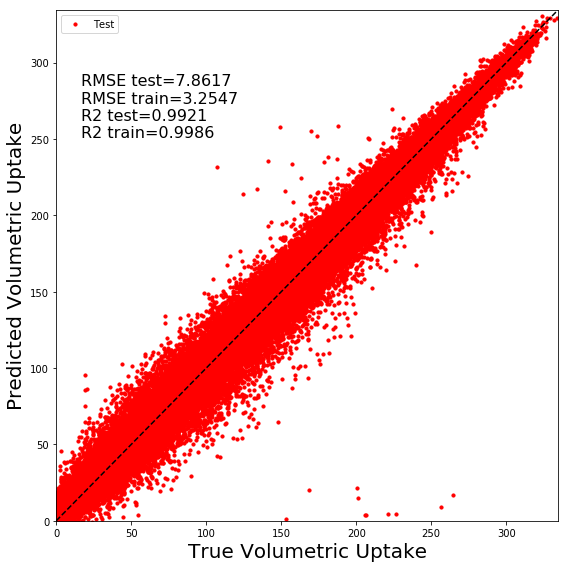

In [60]:
# Evaluation of test error and plotting parity

#model = tf.keras.models.load_model('model_checkpoint_bandgap.h5')



fig1,ax1 = plt.subplots(figsize = (8,8))


#plot un-normed
#loss, mae, mse = model.evaluate(test_fp.to_numpy(), res_test_label.to_numpy(), verbose=2)
#print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))
#tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), res_train_label.to_numpy(), verbose=2)
#tr_rmse = math.sqrt(tr_mse)
#rmse = math.sqrt(mse)
rmse = get_rmse(res_test_label, res_test_predictions)

tr_rmse = get_rmse(res_train_label, res_train_predictions)

from sklearn.metrics import r2_score as r2

r2_val = r2(y_true=res_test_label, y_pred=res_test_predictions)
r2_tr = r2(y_true=res_train_label, y_pred=res_train_predictions)

print("This is Test RMSE: ", rmse)
print("This is Train RMSE: ", tr_rmse)

ax1.scatter(res_test_label, res_test_predictions, c='r',s=10, label='Test')
ax1.set_xlabel('True Volumetric Uptake',fontsize=labelfontsize)
ax1.set_ylabel('Predicted Volumetric Uptake',fontsize=labelfontsize)
max_val = max([max(res_test_label),max(res_test_predictions)])+1
ax1.set_xlim(0, max_val)
ax1.set_ylim(0, max_val)

##############################

#default
# loss, mae, mse = model.evaluate(test_fp.to_numpy(), test_label.to_numpy(), verbose=2)
# print("Testing set Mean Abs Error: {:5.2f} bg".format(mae))

# tr_loss, tr_mae, tr_mse = model.evaluate(train_fp.to_numpy(), train_label.to_numpy(), verbose=2)

# tr_rmse = math.sqrt(tr_mse)
# rmse = math.sqrt(mse)
#ax1.scatter(test_label, test_predictions, c='r',s=10) 
#ax1.scatter(train_label, train_predictions, c='b',s=10)
# ax1.set_xlabel('True normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
# ax1.set_ylabel('Predicted normalized CH4 Uptake @ 1 bar',fontsize=labelfontsize)
#ax1.set_xlim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
#ax1.set_ylim(min([min(test_label),min(test_predictions)])-1,max([max(test_label),max(test_predictions)])+1)
###############################################
ax1.legend()
plot_x_min, plot_x_max = plt.xlim()
plot_y_min, plot_y_max = plt.ylim()

ax1.plot(np.linspace(plot_x_min,plot_x_max,100),np.linspace(plot_y_min,plot_y_max,100),c='k',ls='--')
text_position_x = plot_x_min + (plot_x_max - plot_x_min) * 0.05
text_position_y = plot_y_max - (plot_y_max - plot_y_min) * 0.25

#ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse), ha='left', fontsize=16)

ax1.text(text_position_x, text_position_y, "RMSE test=" + str("%.4f" % rmse) + '\n' + 
         "RMSE train=" + str("%.4f" % tr_rmse) + '\n' +
         "R2 test=" + str("%.4f" % r2_val) + '\n' +
         "R2 train=" + str("%.4f" % r2_tr), ha='left', fontsize=16)

# ax1.text(text_position_x, text_position_y, "MAE=" + str("%.4f" % mae) + ' \n' + 
#          "MSE=" + str("%.4f" % mse), ha='left', fontsize=16)
fig1.tight_layout()
#plt.savefig('./%s_test_parity_%s.png'%(property_used, total_frac),dpi=200)



# Save model

In [ ]:
import os

In [61]:
path = 'model_i1_j70_k0_l1_w_noise/'
os.makedirs(path, exist_ok=True)
plt.savefig(path+'parity.png',dpi=400)
bst.save_model(path+'model.xgb')

with open(path+'train_dataset.pickle', 'wb') as handle:
    pickle.dump(train_dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(path+'test_dataset.pickle', 'wb') as handle:
    pickle.dump(test_dataset, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(path+'params.pickle', 'wb') as handle:
    pickle.dump(params, handle, protocol=pickle.HIGHEST_PROTOCOL)
train_label.to_csv(path+'train_label.csv')
test_label.to_csv(path+'test_label.csv')

/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  app.launch_new_instance()
/home/modules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


<Figure size 432x288 with 0 Axes>

# Load model

In [4]:
stacked = True

In [5]:
n_core = 18

In [6]:
if stacked:
    ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_no_norm/stacked.csv')
else:
    ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_no_norm/ml_data.csv')
    #ml_data = pd.read_csv('/home/rgur/efrc/prep_data/all_v1/ml_data.csv')
    #ml_data = pd.read_csv('./all_mofs/stacked.csv')

/home/modules/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
ml_data = ml_data.drop([col for col in ml_data.keys() if 'Smiles' in col] + [col for col in 
                                                                             ml_data.keys() if 'Unnamed' in col] + ['#_of_Linkers'] + ['Metal_ID'], axis=1)

In [8]:
path = 'model_i1_j70_k0_l1_w_noise/'

In [9]:
reg = xgb.XGBRegressor()

booster = xgb.Booster()

booster.load_model('model_i1_j70_k0_l1_w_noise/model.xgb')

#reg.colsample_bytree = .6

reg._Booster = booster

[11:03:39] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


# Run for isotherms

In [80]:
isotherm_inds

[0, 11, 89, 170, 367, 600, 1100, 3021, 5321, 7621]

In [81]:
isotherm_files

['hypotheticalMOF_5053773_i_1_j_27_k_27_m_7_cat_1.cif',
 'hypotheticalMOF_5068701_i_2_j_23_k_17_m_1_cat_1.cif',
 'hypotheticalMOF_5015030_i_0_j_24_k_14_m_2_cat_1.cif',
 'hypotheticalMOF_5014191_i_0_j_24_k_5_m_7_cat_2.cif',
 'hypotheticalMOF_5031045_i_0_j_29_k_6_m_13_cat_1.cif',
 'hypotheticalMOF_19362_i_1_j_7_k_5_m_1_cat_3.cif',
 'hypotheticalMOF_5004834_i_0_j_20_k_13_m_1_cat_2.cif',
 'hypotheticalMOF_10590_i_0_j_14_k_5_m_2_cat_1.cif',
 'hypotheticalMOF_5013106_i_0_j_23_k_20_m_3_cat_1.cif',
 'hypotheticalMOF_5063217_i_2_j_20_k_19_m_1_cat_3.cif']

In [118]:
i = 3

In [119]:
def return_df(df, val):
    new_df = df
    new_df['norm_log_pressure'] = val
    return new_df

In [120]:
trial_fp = isotherm_df[isotherm_df['filename'] == isotherm_files[i]].head(1)[features]

In [121]:
trial_pressures = eq_space(min_p, max_p, 50)

In [122]:
trial_df  = pd.concat([trial_fp for p in trial_pressures])

In [123]:
trial_df['norm_log_pressure'] = trial_pressures

In [124]:
#trial_arr = xgb.DMatrix(trial_df)
trial_arr = xgb.DMatrix(trial_df.to_numpy())
#trial_fps = [trial_fp]

In [125]:
try:
    preds = reg.predict(trial_arr)
except:
    preds = reg.predict(trial_df.to_numpy())

In [126]:
mean = target_mean
std = target_std
try:
    res_test_predictions = (test_predictions * std) + mean
except:
    pass
res_preds = (preds * std) + mean

In [127]:
res_pressures = np.exp([(i * log_p_std) + log_p_mean for i in trial_pressures]).tolist()

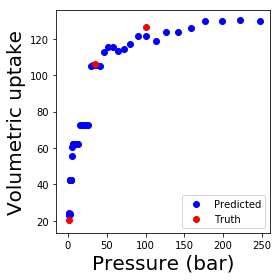

In [128]:
fig1,ax1 = plt.subplots(figsize = (4,4))
plt.scatter(res_pressures, res_preds, c='b', label='Predicted')
try:
    plt.scatter(isotherm_pressures[i], isotherm_uptakes[i], c='r', label='Truth')
except:
    pass
plt.legend()
ax1.set_ylabel('Volumetric uptake',fontsize=labelfontsize)
ax1.set_xlabel('Pressure (bar)',fontsize=labelfontsize)
#ax1.set_ylim(ymax=300)
plt.tight_layout()